In [5]:
# ============================================================
# Setup & Load the Ames Housing Dataset
# ============================================================

# Import core libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew, kurtosis

# Configure Seaborn style for all plots
sns.set(style="whitegrid", palette="muted", color_codes=True)

# ---- Load the dataset ----
# Replace the path below with the actual location of your train.csv file
data_file = "/Users/daniel/Northwestern Local/MSDS-422/MSDS - 422/Assignment 1/train.csv"
df = pd.read_csv(data_file)

# ---- Quick dataset overview ----
print(f"Data loaded successfully. Shape: {df.shape[0]} rows × {df.shape[1]} columns")
display(df.head())  # Show first five rows in notebook

Data loaded successfully. Shape: 1460 rows × 81 columns


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Descriptive statistics for SalePrice:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness of SalePrice: 1.88
Kurtosis of SalePrice: 6.51


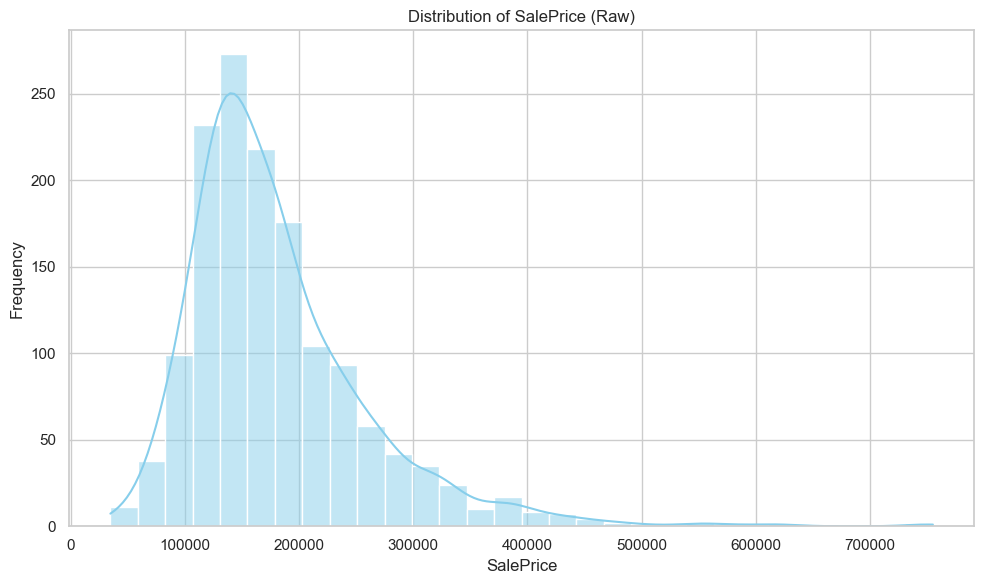

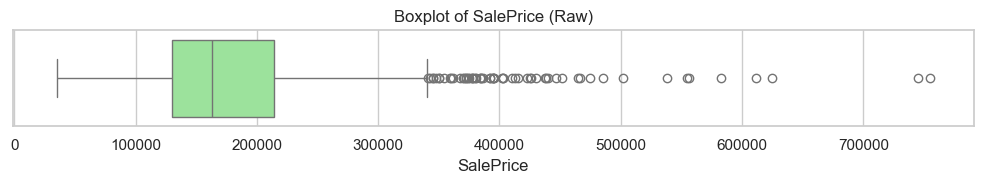

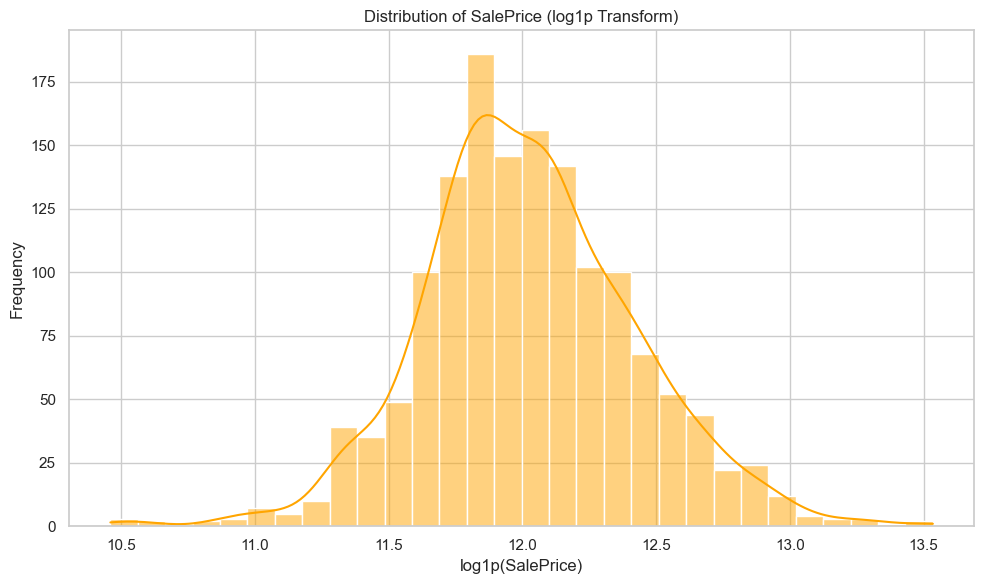

In [7]:
# ============================================================
# Descriptive Statistics & Target Distribution (SalePrice)
# ============================================================

# --- Descriptive statistics ---
print("Descriptive statistics for SalePrice:")
print(df['SalePrice'].describe())

# --- Skewness and kurtosis ---
saleprice_skew = skew(df['SalePrice'])
saleprice_kurtosis = kurtosis(df['SalePrice'])
print(f"\nSkewness of SalePrice: {saleprice_skew:.2f}")
print(f"Kurtosis of SalePrice: {saleprice_kurtosis:.2f}")

# --- Histogram (raw SalePrice) ---
plt.figure(figsize=(10,6))
sns.histplot(df['SalePrice'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of SalePrice (Raw)")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# --- Boxplot (raw SalePrice) ---
plt.figure(figsize=(10,2))
sns.boxplot(x=df['SalePrice'], color='lightgreen')
plt.title("Boxplot of SalePrice (Raw)")
plt.tight_layout()
plt.show()

# --- Histogram (log-transformed SalePrice) ---
plt.figure(figsize=(10,6))
sns.histplot(np.log1p(df['SalePrice']), kde=True, bins=30, color='orange')
plt.title("Distribution of SalePrice (log1p Transform)")
plt.xlabel("log1p(SalePrice)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
### Notes:

#SalePrice Overview
#The dependent variable, SalePrice, contains 1,460 observations with a mean of approximately $180,921 and a median of $163,000. Prices range from $34,900 to $755,000, with the middle 50% of homes selling between $129,975 and $214,000. The relatively high maximum compared to the median indicates a pronounced right tail.

#Distribution Shape
#The histogram shows a strongly right-skewed distribution (skewness 1.88, kurtosis 6.51). Most houses cluster between $100,000 and $250,000, with fewer high-priced properties forming a long tail. The boxplot confirms this, showing numerous outliers above $400,000 and extending up to $755,000.

#Transformation
#Applying a log1p transform produces a much more symmetric, bell-shaped distribution, with the central mass between roughly 11.3 and 12.5 on the log scale. This is beneficial for regression models or other analyses that assume normality and reduces the influence of outliers.

#Key Insight
#Because SalePrice is skewed and contains high-value outliers, subsequent modeling or correlation analyses should either use the log-transformed version of SalePrice or apply robust methods to ensure stability.

Columns with missing values (percent missing):
PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
dtype: float64


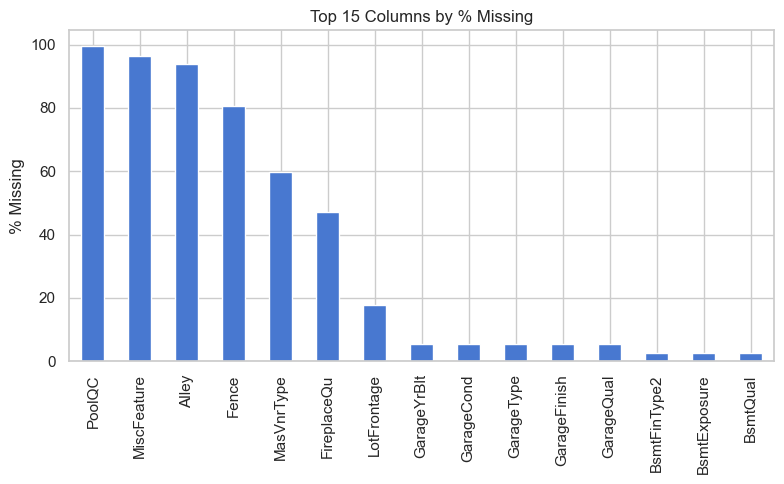

In [9]:
# ============================================================
# Missing Data Overview
# ============================================================

# Percent of missing values per column
missing_pct = df.isnull().mean().sort_values(ascending=False) * 100
missing_pct = missing_pct[missing_pct > 0]  # only show columns with NAs

print("Columns with missing values (percent missing):")
print(missing_pct.head(15))  # top 15

# Optional: plot top 15 missing columns
plt.figure(figsize=(8,5))
missing_pct.head(15).plot(kind='bar')
plt.title('Top 15 Columns by % Missing')
plt.ylabel('% Missing')
plt.tight_layout()
plt.show()

In [ ]:
### Notes ####
#Missing Data Patterns
#The dataset shows substantial missingness in several variables. For example, PoolQC (99.5%), MiscFeature (96.3%), Alley (93.8%), and Fence (80.8%) are missing for the majority of records. This reflects optional or rare features most homes in the sample do not have pools, alleys, or fences recorded. Other columns show moderate missingness such as MasVnrType (59.7%), FireplaceQu (47.3%), and LotFrontage (17.7%). Garage-related variables (GarageYrBlt, GarageCond, GarageType, GarageFinish, GarageQual) have around 5.5% missing, typically when a home has no garage. Basement features such as BsmtFinType2, BsmtExposure, and BsmtQual have very low missingness (2.5–2.6%).

#Handling Missing Data
#Features where “NA” truly means “not present” (e.g., PoolQC, MiscFeature, Alley) can be encoded as "None" or zero to reflect absence rather than leaving them blank. For numeric attributes such as LotFrontage or GarageYrBlt, median imputation or domain-specific values are appropriate. This prevents loss of observations while retaining the semantic meaning of missing values.

#Key Insight
#Distinguishing between structural missingness (feature not present) and random missingness (data entry gaps) ensures more accurate modeling. By clearly documenting these imputations, you preserve the integrity of the dataset and avoid introducing bias.

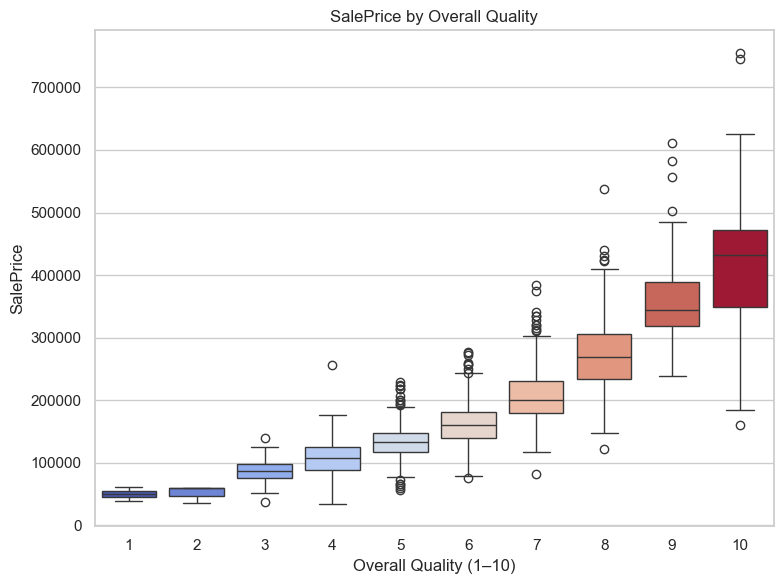

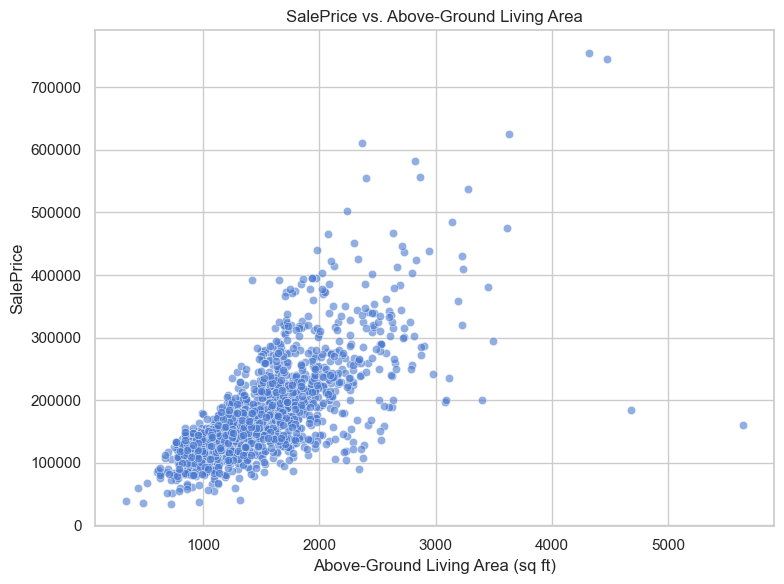

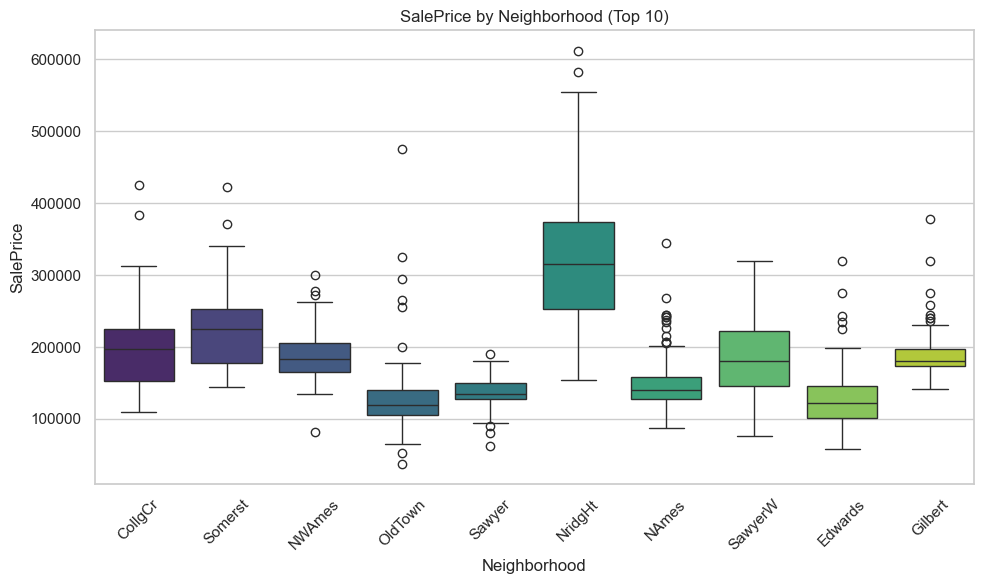

In [13]:
# ============================================================
# Exploring Key Predictors vs. SalePrice
# ============================================================

# 1. Boxplot of SalePrice by OverallQual
plt.figure(figsize=(8,6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df, hue='OverallQual',
            palette='coolwarm', legend=False)
plt.title('SalePrice by Overall Quality')
plt.xlabel('Overall Quality (1–10)')
plt.ylabel('SalePrice')
plt.tight_layout()
plt.show()

# 2. Scatterplot of GrLivArea vs SalePrice
plt.figure(figsize=(8,6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df, alpha=0.6)
plt.title('SalePrice vs. Above-Ground Living Area')
plt.xlabel('Above-Ground Living Area (sq ft)')
plt.ylabel('SalePrice')
plt.tight_layout()
plt.show()

# 3. Boxplot of SalePrice by Neighborhood (Top 10)
top_neighborhoods = df['Neighborhood'].value_counts().index[:10]
plt.figure(figsize=(10,6))
sns.boxplot(x='Neighborhood', y='SalePrice', 
            data=df[df['Neighborhood'].isin(top_neighborhoods)],
            hue='Neighborhood', palette='viridis', legend=False)
plt.title('SalePrice by Neighborhood (Top 10)')
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
### Notes ###

#Overall Quality (OverallQual)
#The boxplot shows a steep upward trend in SalePrice as Overall Quality rises from 1 to 10. Median prices roughly double between mid-tier homes (quality 5–6) and top-tier homes (quality 9–10). At the high end, homes rated 9–10 frequently sell above $400,000, with some exceeding $700,000, whereas homes rated 3–4 cluster below $150,000. This confirms OverallQual is one of the strongest single predictors of SalePrice.

#Above-Ground Living Area (GrLivArea)
#The scatterplot reveals a clear positive linear relationship between above-ground living area and SalePrice. Most homes cluster between 1,000–2,500 square feet, selling for $100,000–$300,000. Larger homes up to 5,000 square feet often exceed $400,000, though a few large outliers sell at lower prices, hinting at unusual conditions or distressed sales.

#Neighborhood
#The boxplot of the top 10 neighborhoods shows substantial variation in median SalePrice by location. For example, NridgHt and Somerst have median prices above $250,000 (some reaching $500,000+), while OldTown and Sawyer have median prices closer to $150,000. This highlights location as a major driver of house prices in Ames.

#Key Insight
#Together, these predictors capture three critical valuation dimensions quality, size, and location that explain much of the variation in SalePrice. They provide strong candidates for inclusion in any predictive model or valuation strategy.

HouseAge feature created. Descriptive stats:
count    1460.000000
mean       36.547945
std        30.250152
min         0.000000
25%         8.000000
50%        35.000000
75%        54.000000
max       136.000000
Name: HouseAge, dtype: float64


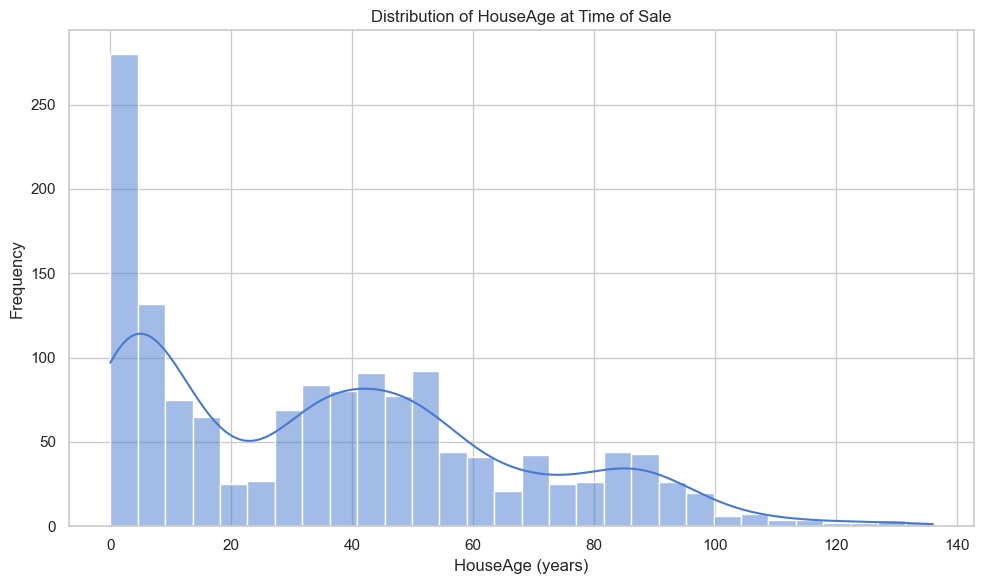

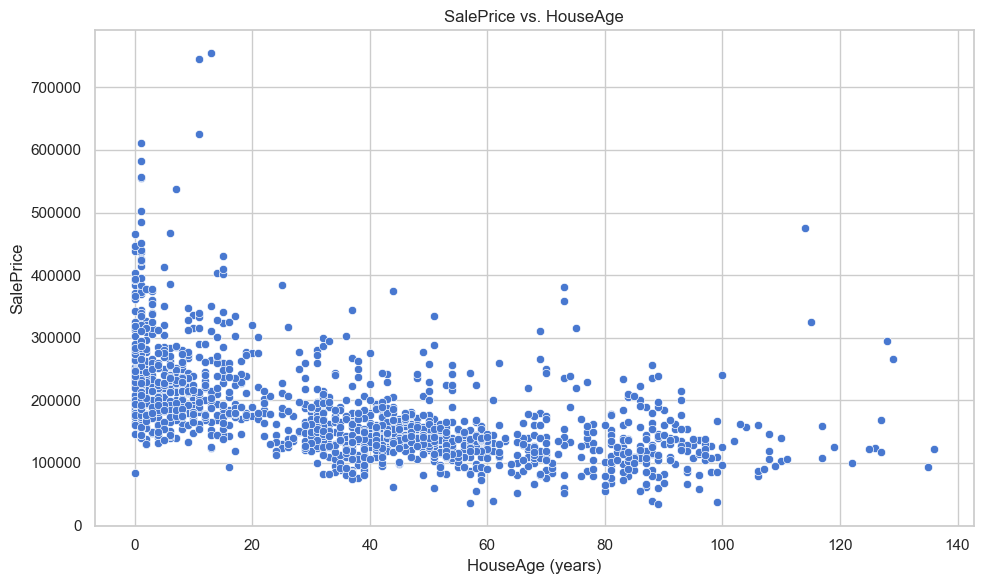

Correlation between HouseAge and SalePrice: -0.52


In [27]:
# --- Section 3: Feature Engineering (HouseAge) ---

# Create a new feature: HouseAge at time of sale
df['HouseAge'] = df['YrSold'] - df['YearBuilt']

# Check the new feature
print("HouseAge feature created. Descriptive stats:")
print(df['HouseAge'].describe())

# Plot HouseAge distribution
plt.figure(figsize=(10,6))
sns.histplot(df['HouseAge'], kde=True, bins=30)
plt.title("Distribution of HouseAge at Time of Sale")
plt.xlabel("HouseAge (years)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Examine relationship between HouseAge and SalePrice
plt.figure(figsize=(10,6))
sns.scatterplot(x='HouseAge', y='SalePrice', data=df)
plt.title("SalePrice vs. HouseAge")
plt.xlabel("HouseAge (years)")
plt.ylabel("SalePrice")
plt.tight_layout()
plt.show()

# Correlation between HouseAge and SalePrice
corr = df['HouseAge'].corr(df['SalePrice'])
print(f"Correlation between HouseAge and SalePrice: {corr:.2f}")

In [ ]:
#HouseAge Overview
#A new feature, HouseAge, was created to measure the age of each home at the time of sale (YrSold – YearBuilt). Among 1,460 homes, the average age is 36.5 years with a median of 35 years. HouseAge ranges from 0 years (brand new homes) to 136 years for the oldest properties, with the middle 50% between 8 and 54 years.

#Distribution
#The histogram shows that many homes cluster at very low ages (spikes at 0–5 years), indicating newer construction, with smaller peaks at 30–50 years and a long tail of much older homes.

#Relationship with SalePrice
#The scatterplot shows a moderate negative correlation between HouseAge and SalePrice (r = –0.52). In general, newer homes command higher prices, while older homes tend to sell for less, although some older homes still achieve high prices, likely due to renovations, location, or unique features.

#Key Insight
#Age at sale is a meaningful predictor: newer or recently built homes typically attract a price premium. Including HouseAge in modeling helps capture depreciation effects and buyer preference for newer construction.

In [17]:
# ============================================================
# Feature Creation & Scaling
# ============================================================

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# --- 1. Feature Creation ---
current_year = df['YrSold'].max()  # or set to 2010
df['HouseAge'] = current_year - df['YearBuilt']

# Remodeled indicator: 1 if YearRemodAdd > YearBuilt else 0
df['Remodeled'] = (df['YearRemodAdd'] > df['YearBuilt']).astype(int)

# Total bathrooms including basement (full + half baths weighted 0.5)
df['TotalBaths'] = (
    df.get('FullBath',0) + 0.5*df.get('HalfBath',0)
    + df.get('BsmtFullBath',0) + 0.5*df.get('BsmtHalfBath',0)
)

print("New feature columns added: HouseAge, Remodeled, TotalBaths")
print(df[['HouseAge','Remodeled','TotalBaths']].head())

# --- 2. Scaling: MinMax & Standard ---
scalers = {
    "minmax": MinMaxScaler(),
    "standard": StandardScaler()
}

# Choose variables to scale (SalePrice + new features)
features_to_scale = ['SalePrice','HouseAge','TotalBaths']

scaled_df = pd.DataFrame()

for feature in features_to_scale:
    for name, scaler in scalers.items():
        scaled_df[f"{feature}_{name}"] = scaler.fit_transform(df[[feature]]).ravel()

# Combine raw and scaled into one table for easy comparison
comparison_df = pd.concat([
    df[features_to_scale].reset_index(drop=True),
    scaled_df.reset_index(drop=True)
], axis=1)

print("\nSample of raw vs. scaled features:")
print(comparison_df.head())

# Optional: Save scaled version to df if you want to use later
# df[ [f"{feature}_{name}" for feature in features_to_scale for name in scalers] ] = scaled_df

New feature columns added: HouseAge, Remodeled, TotalBaths
   HouseAge  Remodeled  TotalBaths
0         7          0         3.5
1        34          0         2.5
2         9          1         3.5
3        95          1         2.0
4        10          0         3.5

Sample of raw vs. scaled features:
   SalePrice  HouseAge  TotalBaths  SalePrice_minmax  SalePrice_standard  \
0     208500         7         3.5          0.241078            0.347273   
1     181500        34         2.5          0.203583            0.007288   
2     223500         9         3.5          0.261908            0.536154   
3     140000        95         2.0          0.145952           -0.515281   
4     250000        10         3.5          0.298709            0.869843   

   HouseAge_minmax  HouseAge_standard  TotalBaths_minmax  TotalBaths_standard  
0         0.050725          -1.050994                0.5             1.642256  
1         0.246377          -0.156734                0.3             0.368581 

In [ ]:
### Notes ###

#Feature Creation
#Three new features were engineered to enrich the dataset:
#HouseAge measures the age of the home at the time of sale. In the sample shown, ages range from 7 years to 95 years, capturing both very new and very old homes.
#Remodeled flags whether a home has been remodeled (1) or not (0). In the first five rows, two homes are remodeled, three are not.
#TotalBaths aggregates all full and half bathrooms above and below grade into a single measure. The sample shows homes ranging from 2.0 to 3.5 bathrooms, reflecting differences in capacity.

#Scaling
#Both Min–Max Scaling and Standard Scaling were applied to SalePrice, HouseAge, and TotalBaths. For instance, in the first five rows:
#SalePrice ranges from $140,000 to $250,000, scaling to 0.1459–0.2987 (Min–Max) and –0.5153 to +0.8698 (Standard).
#HouseAge spans 7 to 95 years, scaling to 0.05–0.688 (Min–Max) and –1.05 to +1.86 (Standard).
#TotalBaths goes from 2.0 to 3.5, scaling to 0.2–0.5 (Min–Max) and –0.27 to +1.64 (Standard).

#Key Insight
#Feature engineering adds critical dimensions (age, remodeling status, bathroom capacity) that help explain house prices. Scaling places these variables on comparable ranges, which is especially important for algorithms sensitive to feature scale. Together, these steps improve interpretability and predictive power while ensuring fair comparisons between variables with different units.